# Montecarlo Roulete Simulation

Sotto le ipotesi di:
* effettuare una media di 33 giocate all'ora;
* poter effettuare una puntata minima sul colore di 2€;
* poter effettuare una puntata massima sul colore di 1000€;
* avere un budget iniziale di 300€;
* giocare ad roulette con 36 caselle colorate rosse o nere ed uno zero tutte equiprobabili.

La simulazione Montecarlo (effettauta con 100.000 iterazioni) mostra il guadagno medio dopo 3 ore di gioco (100 giocate) utilizzando la seguente strategia:
* alla prima giocata e ad ogni successviva ad una vincente si punta sul rosso la minima puntata possibile;
* se la precedente giocata è stata perdente, si punta sul rosso il doppio della puuntata precedete;
* se il budget disponibile non consente di raddoppiare la puntata precedente si riparte con la puntata minima;
* se il budget disponibile non consente di effettuare la puntata minima, il gioco si ferma.

In [1]:
import random
import numpy as np
import pandas as pd

In [2]:
# parametri
simNumber = 100000
playsNumber = 100
minBet = 2
maxBet = 1000
initBudget = 300

profitMatrix = []
j = 1
while j <= simNumber:
    i = 1
    budget = initBudget
    lastBet = minBet
    lastWin = True
    budgetHistory = []
    colorHistory = []
    betHistory = []
    
    while i <= playsNumber :
        sample = random.randrange(0,37)
        sampleRed = (sample % 2 == 0)
        if sample == 0:
            sampleRed = False
        
        if lastWin:
            bet = minBet
        else:
            bet = 2*lastBet
            if bet > 500:
                bet = lastBet
        lastBet = bet
    
        if sampleRed:
            budget = budget + bet
            budgetHistory.append(budget)
            colorHistory.append(sampleRed)
            betHistory.append(bet)
            lastWin = True
            i = i+1
        elif budget-bet >= 0:
            lastWin = False
            budget = budget - bet
            budgetHistory.append(budget)
            colorHistory.append(sampleRed)
            betHistory.append(bet)
            i = i+1
        elif budget-minBet >= 0:
            bet = minBet
            lastBet = bet
            latWin = False
            budget = budget - bet
            budgetHistory.append(budget)
            colorHistory.append(sampleRed)
            betHistory.append(bet)
            i = i+1
        else:
            bet = 0
            budget = budget - bet
            budgetHistory.append(budget)
            colorHistory.append(sampleRed)
            betHistory.append(bet)
            i = i+1
    j = j+1    
    profitMatrix.append(np.array(budgetHistory)-300)

profitMatrix = pd.DataFrame(profitMatrix).T

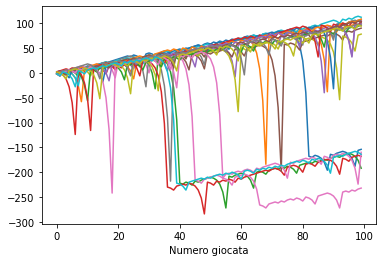

In [3]:
profitMatrix.index.name = 'Numero giocata'
profitMatrix.iloc[:,0:20].plot(legend=False)

In [4]:
print("Il profitto medio effettuando " + str(playsNumber) + " giocate e disponendo di " + str(initBudget) + "€ di budget è di " + str(np.around(np.mean(profitMatrix.iloc[-1]),2)) + "€")

Il profitto medio effettuando 100 giocate e disponendo di 300€ di budget è di 36.22€
